In [1]:
# RNN - are used in SEQUENCES - such as, Time Series (Sales), Sentence (completion), Audio,  Car Trajectories, Music

In [2]:
# Order is essential

In [3]:
# For time series data,to know what history holds, (in order to predict future),output of neuron is also fed back to itself

In [4]:
# Recurrent Neuron

In [5]:
# RNNs have different kind of input and output formats and fully flexible in terms of that
# Sequence to Sequence - Many to Many -> Give 5 words, predict next 5 words
# Sequence to Vector - Many to One -> Give 5 words, predict next 1 word - Text Generation
# Vector to Sequence - One to Many -> Give 1 words, predict next 5 words


In [6]:
# Basic RNN's disadvantage is - it only remembers ONE step back, cant keep track of longer history

Exploding and Vanishing Gradients - 

In [8]:
'''Backpropogation - when you go back to the input layer from the output layer in the end through hidden layers, changes in
weights and biases become so small that it doesnt modified at all - Gradient Vanishing'''

'Backpropogation - when you go back to the input layer from the output layer in the end through hidden layers, changes in\nweights and biases become so small that it doesnt modified at all '

In [9]:
# The opposite happen in the feed-forward models, in the way to the output layer from input, gradient values becomes so
# significantly bigger that it change the values of bias and weights profoundly - Gradient Explotion

Why those happen

In [10]:
# When n hidden layers use activation function like sigmoid, n small DERIVATIVES are multiplied together making the 
# exponential descrease in the gradient values as the model backpropogates down to initial layers

In [11]:
# Picture - derivative and itself of sigmoid

In [12]:
# Thus, it is all about activation functions - to fix this issue, we can edit activation function itself
# Rectified Linear Unit is widely used since it doesnt saturate bigger values
# Leaky RELU, Exponential RELU, 

In [13]:
# Another solution is to use batch normalization which is normalizing each batch based on batch mean and std deviation

In [14]:
# Gradient clipping is also used to put borders on gradient to prevent them becoming too big or too small

Long Short Memory Neuron Units - LSTM

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x = np.linspace(0,50, 501)

In [21]:
y = np.sin(x)

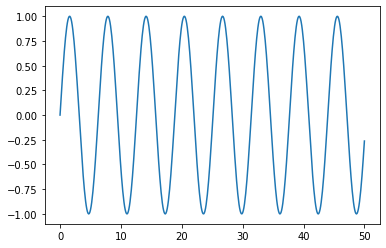

In [23]:
plt.plot(x, y)

In [25]:
df = pd.DataFrame(data=y, index=x, columns=['sine'])

In [26]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [27]:
len(df)

501

In [28]:
test_percent = 0.1
# 10 percent to be test data


In [30]:
len(df) * test_percent

50.1

In [31]:
test_point = np.round(len(df)* test_percent)

In [33]:
test_point

50.0

In [34]:
test_index = int(len(df) - test_point)

In [35]:
test_index

451

In [36]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [37]:
train

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [41]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [42]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [69]:
# Generating for batches
length = 50
batch_size = 1

generator = TimeseriesGenerator(train_scaled, train_scaled,
                               length=length,
                               batch_size=batch_size)

In [70]:
len(train_scaled)

451

In [71]:
len(generator)

401

In [72]:
X, y = generator[0]

In [73]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [65]:
y

array([[0.79923759]])

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [75]:
n_features = 1

In [68]:
# Need to feed one season; cycle at least

In [76]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit_generator(generator, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
401/401 [==============================] - 6s 15ms/step - loss: 0.0059
Epoch 2/5
401/401 [==============================] - 4s 11ms/step - loss: 2.7162e-04
Epoch 3/5
401/401 [==============================] - 4s 10ms/step - loss: 7.5933e-04
Epoch 4/5
401/401 [==============================] - 5s 12ms/step - loss: 2.2549e-05
Epoch 5/5
401/401 [==============================] - 5s 11ms/step - loss: 8.9571e-06


In [79]:
loss = pd.DataFrame(model.history.history)

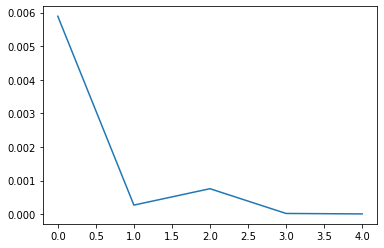

In [80]:
plt.plot(loss)

In [81]:
first_eval_batch = train_scaled[-length:]

In [83]:
len(first_eval_batch)

50

In [85]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [86]:
model.predict(first_eval_batch)

array([[0.9497892]], dtype=float32)

In [87]:
test_scaled[0]

array([0.94955134])

In [88]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))



In [91]:
# predicted = [[[99]]]
# np.append(current_batch[:, 1:, :],predicted, axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [121]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch =  np.append(current_batch[:, 1:, :], [[current_pred]] , axis=1)

In [124]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

C:\Users\agamm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
test

,sine,Predictions,LSTMPredictions
45.1,0.899097,0.908176,0.908176
45.2,0.938307,0.946886,0.946886
45.3,0.968142,0.976233,0.976233
45.4,0.988304,0.995825,0.995825
45.5,0.998591,1.005465,1.005465
45.6,0.998900,1.005112,1.005112
45.7,0.989229,0.994853,0.994853
45.8,0.969673,0.974890,0.974890
45.9,0.940429,0.945516,0.945516
46.0,0.901788,0.907107,0.907107


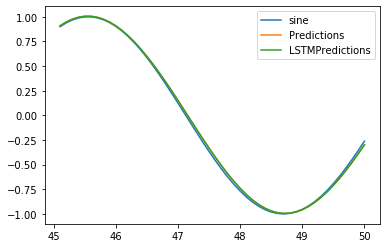

In [126]:
test.plot()

In [127]:
from tensorflow.keras.callbacks import EarlyStopping

In [128]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [129]:
length = 49
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=1)

validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=1)

In [130]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

In [132]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch =  np.append(current_batch[:, 1:, :], [[current_pred]] , axis=1)

C:\Users\agamm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


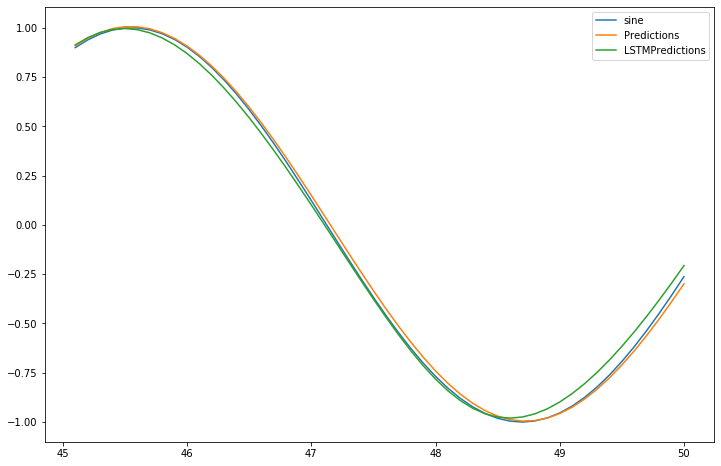

In [133]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTMPredictions'] = true_predictions
test.plot(figsize=(12,8))

In [137]:
full_scaler = MinMaxScaler()
scaled_all_data = full_scaler.fit_transform(df)

In [139]:
full_generator = TimeseriesGenerator(scaled_all_data, scaled_all_data, length=length, batch_size=1)

In [140]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [141]:
model.fit_generator(generator, epochs=6)

Epoch 1/6
402/402 [==============================] - 21s 53ms/step - loss: 0.0208 3s - lo
Epoch 2/6
402/402 [==============================] - 19s 48ms/step - loss: 3.2330e-04
Epoch 3/6
402/402 [==============================] - 20s 49ms/step - loss: 1.0657e-04
Epoch 4/6
402/402 [==============================] - 19s 48ms/step - loss: 9.8219e-04
Epoch 5/6
402/402 [==============================] - 21s 51ms/step - loss: 3.0111e-05 1 - ETA: 0s - loss: 3.
Epoch 6/6
402/402 [==============================] - 22s 55ms/step - loss: 1.8314e-05


In [142]:
forecast = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch =  np.append(current_batch[:, 1:, :], [[current_pred]] , axis=1)

In [146]:
forecast = scaler.inverse_transform(forecast)

forecast_index = np.arange(50.1, 52.6, step=0.1)

In [147]:
len(forecast_index)

25

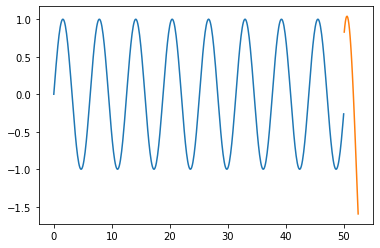

In [149]:
plt.plot(df.index, df['sine'])
plt.plot(forecast_index, forecast)